<a href="https://colab.research.google.com/github/Naresh-812/Introduction_to_ML/blob/main/web_cam_test_paddy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model("/content/drive/MyDrive/trained _models/paddy_basic_cnn_leaf__model.h5")

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save it
with open("/content/drive/MyDrive/trained/paddy_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpbweu2tfa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136538051490832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538051489488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538051490640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538051488912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538051491024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538051489680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538051488528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538051489104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538051487568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538047234896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136538047235

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/trained/paddy_model.tflite'

In [15]:
model = load_model('//content/drive/MyDrive/trained _models/paddy_model.tflite')


ValueError: File format not supported: filepath=//content/drive/MyDrive/trained _models/paddy_model.tflite. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(//content/drive/MyDrive/trained _models/paddy_model.tflite, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


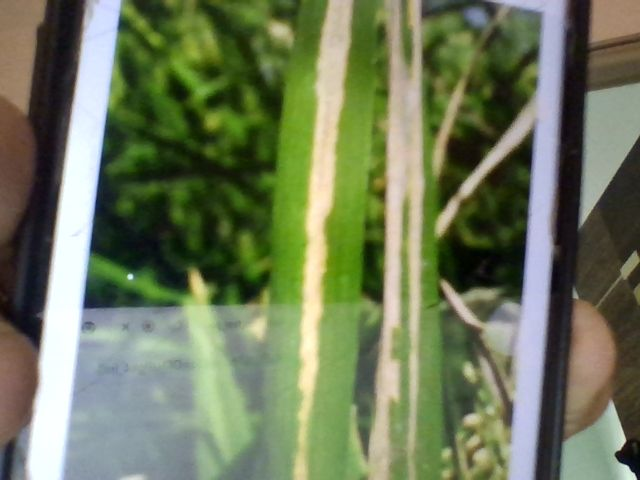

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = filename  # Replace with your test image
img = image.load_img(img_path, target_size=(224, 224))  # VGG16 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize same as training
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

class_indices = {'bacterial_leaf_blight': 0, 'brown_spot': 1, 'healthy': 2, 'leaf_blast': 3, 'leaf_scald': 4, 'narrow_brown_spot': 5, 'neck_blast': 6, 'rice_hispa': 7, 'sheath_blight': 8, 'tungro': 9}
labels = list(class_indices.keys())
predicted_class = labels[predicted_class_index]

print(f"Predicted class: {predicted_class}")
print(predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
Predicted class: bacterial_leaf_blight
0
